<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع مورد نیاز
</b>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import pickle
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- خواندن تصویر و تبدیل به سیاه و سفید
</b>
</div>

In [4]:
img = cv2.imread(f"{working_dir}/opencv-images/isotermal-b3-1_5.jpg", cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- تبدیل اطلاعات تصویر به دیتافریم
</b>
</div>

In [ ]:
dic = {}
for i in range(522):
    dic[i] = im_bw[:,i]
df = pd.DataFrame(dic)
#----------------- Remove the first 7 rows and the last 6 rows -----------------
df.drop(index=[0,1,2,3,4,5,6,329,330,331,332,333,334],inplace=True)
#----------------- Remove the first 12 columns and the last 12 columns -----------------
df.drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,514,515,516,517,518,519,520,521],inplace=True)
df.reset_index(drop=True,inplace=True)
df.columns = range(df.shape[1])
print(df.shape)
df.to_csv(f"{working_dir}/opencv-images/1.csv", index=True,header=True)
del df

(322, 502)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
4- تبدیل اطلاعات تصویر بصورت x و y و label
</b>
</div>

(322, 502)


/tmp/ipykernel_3864/1000807215.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


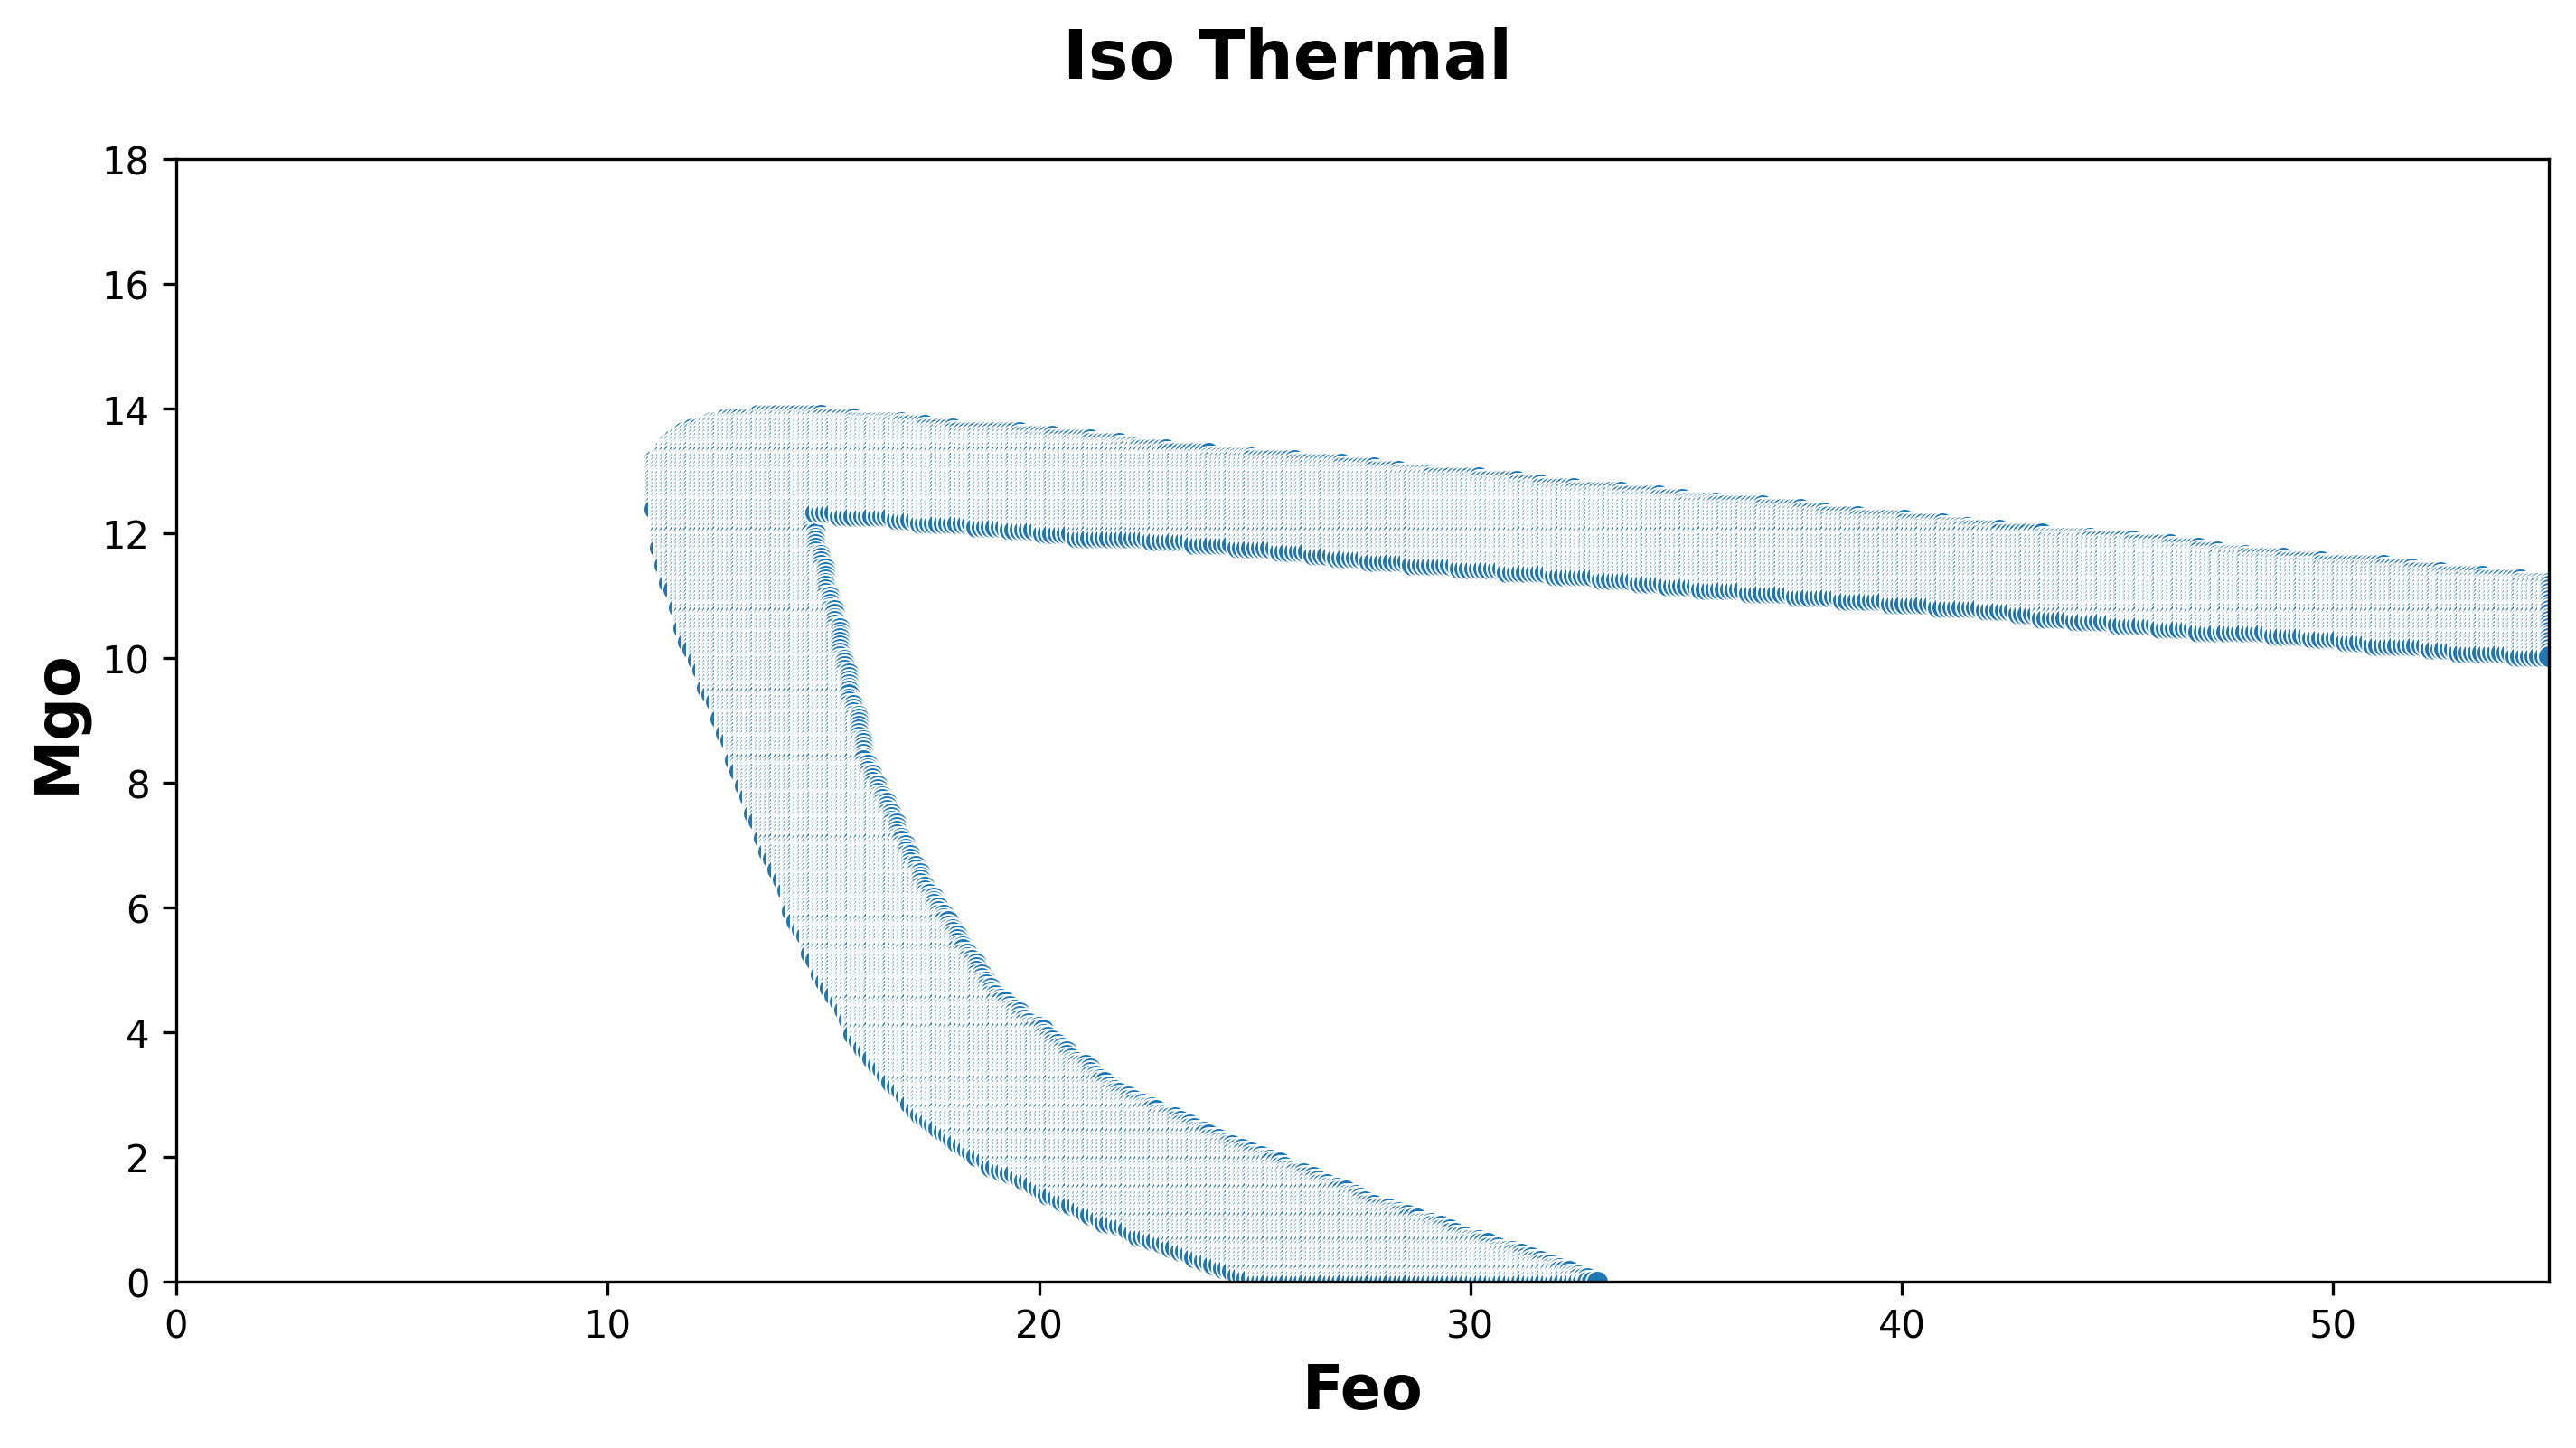

In [ ]:
df = pd.read_csv(f"{working_dir}/opencv-images/1.csv",index_col=0)
print(df.shape)

dic_xscale =dict(zip(range(0,df.shape[1]),np.linspace(start=0,stop=55,num=df.shape[1]).round(2)))
dic_yscale =dict(zip(range(0,df.shape[0]),np.linspace(start=18,stop=0,num=df.shape[0]).round(2)))
dicxy = {}
xlist = []
ylist = []
label = []
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if df.iloc[j,i]== 255:
            xlist.append(dic_xscale[i])
            ylist.append(dic_yscale[j])
            label.append(1)
        if df.iloc[j,i]== 0:
            xlist.append(dic_xscale[i])
            ylist.append(dic_yscale[j])
            label.append(0)
dicxy['x'] = xlist
dicxy['y'] = ylist
dicxy['label'] = label
xydf = pd.DataFrame(dicxy)
#------------------- Plotting the image -------------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('Iso Thermal', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlim(0,55)
ax1.set_ylim(0,18)
ax1.set_xlabel('Feo', fontsize=16,fontweight='bold')
ax1.set_ylabel('Mgo', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=xydf[xydf['label']==0],
    x='x',
    y='y',
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()
#------------------- Save the data -------------------
xydf.to_csv(f"{working_dir}/opencv-images/1xy.csv", index=True,header=True)
del xydf,df,dicxy

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
5- مدلسازی و پردیکت
</b>
</div>

In [8]:
df = pd.read_csv(f"{working_dir}/opencv-images/1xy.csv",index_col=0)
print(df.head())
#----------------End Of Plot
mask = df.columns.str.contains('x|y')
print(df.columns[mask])
X=df[df.columns[mask]].values
y = df[['label']].values.ravel()
#---------------Make Train and Test Set----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y.shape)
#---------------Make Random Forest Classifier----------------
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
#---------------Predict Test Set----------------
y_pred = clf.predict(X_test)
#---------------Calculate Accuracy----------------
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#---------------Save Model----------------
#pickle.dump(clf, open(f"{working_dir}/trained_models/feo-mgo-isothermal.pkl", 'wb'))
print(clf.predict([[15, 4.0]]))
#loaded_model = pickle.load(open(filename, 'rb'))

df_predict = pd.read_csv(f"{working_dir}/data/slag.csv")
mask = df_predict.columns.str.contains('feo|mgo')
print(df_predict.columns[mask])
X=df_predict[df_predict.columns[mask]].values
print(X.shape)
predict = clf.predict(X)
print(np.unique(predict,return_counts=True))

     x      y  label
0  0.0  18.00      1
1  0.0  17.94      1
2  0.0  17.89      1
3  0.0  17.83      1
4  0.0  17.78      1
Index(['x', 'y'], dtype='object')
(129315, 2) (161644,)
Accuracy: 0.9975873055151722
[1]
Index(['feo (Slag)', 'mgo (Slag)'], dtype='object')
(1649, 2)
(array([0, 1]), array([  89, 1560]))
